In [54]:
import pandas as pd 
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.cluster import KMeans
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import train_test_split
%matplotlib inline

## Pull the training set from the newsgroup data

In [3]:
newsgroups = fetch_20newsgroups(subset='train')

In [4]:
newsgroups.keys()

['description', 'DESCR', 'filenames', 'target_names', 'data', 'target']

In [7]:
df = pd.DataFrame(newsgroups['data'], columns=['text'])

In [8]:
df.head()

,text
0,From: lerxst@wam.umd.edu (where's my thing)\nS...
1,From: guykuo@carson.u.washington.edu (Guy Kuo)...
2,From: twillis@ec.ecn.purdue.edu (Thomas E Will...
3,From: jgreen@amber (Joe Green)\nSubject: Re: W...
4,From: jcm@head-cfa.harvard.edu (Jonathan McDow...


In [11]:
print df.iloc[1,0]

From: guykuo@carson.u.washington.edu (Guy Kuo)
Subject: SI Clock Poll - Final Call
Summary: Final call for SI clock reports
Keywords: SI,acceleration,clock,upgrade
Article-I.D.: shelley.1qvfo9INNc3s
Organization: University of Washington
Lines: 11
NNTP-Posting-Host: carson.u.washington.edu

A fair number of brave souls who upgraded their SI clock oscillator have
shared their experiences for this poll. Please send a brief message detailing
your experiences with the procedure. Top speed attained, CPU rated speed,
add on cards and adapters, heat sinks, hour of usage per day, floppy disk
functionality with 800 and 1.4 m floppies are especially requested.

I will be summarizing in the next two days, so please add to the network
knowledge base if you have done the clock upgrade and haven't answered this
poll. Thanks.

Guy Kuo <guykuo@u.washington.edu>



In [12]:
df.shape

(11314, 1)

In [13]:
df['text_lower'] = df['text'].str.lower()

In [14]:
df.head()

,text,text_lower
0,From: lerxst@wam.umd.edu (where's my thing)\nS...,from: lerxst@wam.umd.edu (where's my thing)\ns...
1,From: guykuo@carson.u.washington.edu (Guy Kuo)...,from: guykuo@carson.u.washington.edu (guy kuo)...
2,From: twillis@ec.ecn.purdue.edu (Thomas E Will...,from: twillis@ec.ecn.purdue.edu (thomas e will...
3,From: jgreen@amber (Joe Green)\nSubject: Re: W...,from: jgreen@amber (joe green)\nsubject: re: w...
4,From: jcm@head-cfa.harvard.edu (Jonathan McDow...,from: jcm@head-cfa.harvard.edu (jonathan mcdow...


## Create the vectorizer

In [61]:
## count vectorizer defaults to creating a sparse matrix. if we use todense, it creates a dataframe

count_vectorizer = CountVectorizer(stop_words='english',
                                  max_features=10000,
                                  )

In [19]:
corpus_1 = count_vectorizer.fit_transform(df['text_lower'].values)

In [20]:
corpus_1

<11314x10000 sparse matrix of type '<type 'numpy.int64'>'
	with 1004156 stored elements in Compressed Sparse Row format>

In [35]:
corpus_1.shape

(11314, 10000)

## Create the Truncated Singular Value Decomposition

In [31]:
tsvd = TruncatedSVD(n_components=2) ## default returns 2 columns

In [32]:
tsvd_word_data = tsvd.fit_transform(corpus_1)

In [34]:
## the two primary components that tsvd produced out of the huge dataset
## conceptually a little bit like PCA
tsvd_word_data[0:5]

array([[  1.17834554e-03,   2.78584922e+00],
       [  1.52753858e-03,  -1.76148652e+01],
       [  1.58567063e-03,   3.97599452e-01],
       [  2.44659360e-03,  -1.03951691e+01],
       [  1.96677117e-03,   6.22259245e+00]])

In [26]:
tsvd_word_data.shape

(11314, 2)

In [39]:
## imports target values. number codes for the different newsgroups

targets = pd.DataFrame(newsgroups['target'], columns=['target_names'])
targets.head()

,target_names
0,7
1,4
2,4
3,1
4,14


In [40]:
targets['target_names'].value_counts()

10    600
15    599
8     598
9     597
11    595
13    594
7     594
14    593
5     593
12    591
2     591
3     590
6     585
1     584
4     578
17    564
16    546
0     480
18    465
19    377
Name: target_names, dtype: int64

In [41]:
newsgroups['target_names']

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [42]:
len(newsgroups['target_names'])

20

In [43]:
zip(range(0,20), newsgroups['target_names'])

[(0, 'alt.atheism'),
 (1, 'comp.graphics'),
 (2, 'comp.os.ms-windows.misc'),
 (3, 'comp.sys.ibm.pc.hardware'),
 (4, 'comp.sys.mac.hardware'),
 (5, 'comp.windows.x'),
 (6, 'misc.forsale'),
 (7, 'rec.autos'),
 (8, 'rec.motorcycles'),
 (9, 'rec.sport.baseball'),
 (10, 'rec.sport.hockey'),
 (11, 'sci.crypt'),
 (12, 'sci.electronics'),
 (13, 'sci.med'),
 (14, 'sci.space'),
 (15, 'soc.religion.christian'),
 (16, 'talk.politics.guns'),
 (17, 'talk.politics.mideast'),
 (18, 'talk.politics.misc'),
 (19, 'talk.religion.misc')]

In [44]:
zipped = pd.DataFrame(zip(range(0,20), newsgroups['target_names']))

In [46]:
zipped

,0,1
0,0,alt.atheism
1,1,comp.graphics
2,2,comp.os.ms-windows.misc
3,3,comp.sys.ibm.pc.hardware
4,4,comp.sys.mac.hardware
5,5,comp.windows.x
6,6,misc.forsale
7,7,rec.autos
8,8,rec.motorcycles
9,9,rec.sport.baseball


In [63]:
## y is just the ones that are talk.politics.guns

y = targets['target_names'].apply(lambda x: 1 if x == 16 else 0)

In [65]:
## electronics
electronics_y = targets['target_names'].apply(lambda x: 1 if x == 12 else 0)

In [49]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: target_names, dtype: int64

In [50]:
y[(y==1)].head()

5      1
39     1
67     1
81     1
127    1
Name: target_names, dtype: int64

In [52]:
print df.iloc[39,0]

From: bressler@iftccu.ca.boeing.com (Rick Bressler)
Subject: Re: Gun Lovers (was Re: My Gun is like my American Express Card)
Organization: Boeing Commercial Airplane Group
Lines: 104

/ iftccu:talk.politics.guns / vincent@cad.gatech.edu (Vincent Fox) / 10:34 am  Apr 14, 1993 /

This isn't rec.guns, so maybe this is getting a bet technical, but I
can't resist....

> - A revolver also has the advantage that if it misfires you just pull
>   the trigger again.

Sometimes.....  Depends on WHY it misfired....

> - A double-action revolver (almost all of them) can be hand-cocked first,
>   but will fire merely by pulling the trigger.

I can't imagine doing much combat type shooting single action.....

> - A misfire in a revolver merely means you must pull the trigger again
>   to rotate to the next round.

Assuming the cylinder WILL rotate....

> - A revolver can be carried with the 6th chamber empty and under the
>   hammer for maximum safety, but still can be drawn and fired with an
>   ea

In [57]:
def tts_and_model(x,y):
    x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3)
    rf = RandomForestClassifier()
    rf.fit(x_train, y_train)
    print "Random Forest test score: ", rf.score(x_test, y_test)

In [58]:
tts_and_model(tsvd_word_data, y)

Random Forest test score:  0.951693667158


In [59]:
tsvd_200 = TruncatedSVD(n_components=200)

In [60]:
tsvd_200_words = tsvd_200.fit_transform(corpus_1)

In [62]:
tts_and_model(tsvd_200_words, y)

Random Forest test score:  0.960530191458


#### ^^^ using 200 components doesn't improve the model significantly over using only 2 components

In [69]:
print tts_and_model(tsvd_word_data, electronics_y)
print tts_and_model(tsvd_200_words, electronics_y)

Random Forest test score:  0.949631811487
None
Random Forest test score:  0.946391752577
None


In [70]:
## predicting all 20 class at once

print tts_and_model(tsvd_word_data, targets['target_names'])
print tts_and_model(tsvd_200_words, targets['target_names'])

Random Forest test score:  0.0754050073638
None
Random Forest test score:  0.243004418262
None


## Setup your k-means clustering

In [72]:
km = KMeans(n_clusters=2)

In [74]:
tsvd_word_data_standardized = StandardScaler().fit_transform(tsvd_word_data)
tsvd_word_data_standardized[0:5]

array([[ -2.71146682e-02,   2.89212928e-01],
       [ -2.71129589e-02,  -2.17514717e+00],
       [ -2.71126743e-02,   7.17763624e-04],
       [ -2.71084600e-02,  -1.30302424e+00],
       [ -2.71108088e-02,   7.04363726e-01]])

In [75]:
km.fit(tsvd_word_data_standardized)

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=2, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0)

In [77]:
## puts labels into a series so that we can call value_counts on it
pd.Series(km.labels_).value_counts()

0    11303
1       11
dtype: int64

In [88]:
kmlab = pd.DataFrame(km.labels_, columns=['kmlabels'])
kmlab.head()

,kmlabels
0,0
1,0
2,0
3,0
4,0


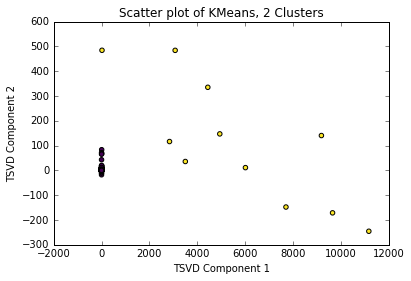

In [96]:
plt.scatter(tsvd_word_data[:,0], tsvd_word_data[:,1], c=kmlab, cmap='viridis')
plt.xlabel("TSVD Component 1")
plt.ylabel("TSVD Component 2")
plt.title("Scatter plot of KMeans, 2 Clusters")


### ^^^ 11 documents that make up one unusual cluster (the spread out ones). what is different about these?

(-20, 70)

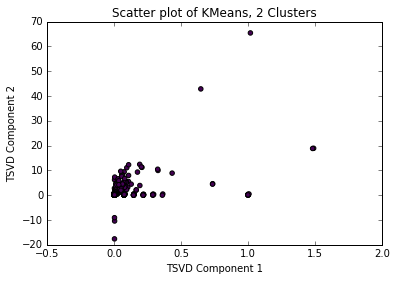

In [100]:
plt.scatter(tsvd_word_data[:,0], tsvd_word_data[:,1], c=kmlab, cmap='viridis')
plt.xlabel("TSVD Component 1")
plt.ylabel("TSVD Component 2")
plt.title("Scatter plot of KMeans, 2 Clusters")
plt.xlim((-.5,2))
plt.ylim((-20,70))

In [110]:
def kmeans_and_graph(x,k):
    km = KMeans(n_clusters=k)
    km.fit(x)
    plt.figure(figsize=(20,16))
    plt.scatter(x[:,0], x[:,1], c=km.labels_, cmap='viridis', s=50)
    plt.title("Scatter plot of KMeans, %s Clusters" % k)
    plt.xlabel("TSVD Component 1")
    plt.ylabel("TSVD Component 2")
    plt.show()

    plt.figure(figsize=(20,16))
    plt.scatter(x[:,0], x[:,1], c=km.labels_, cmap='viridis', s=50)
    plt.title("Scatter plot of KMeans, %s Clusters" % k)
    plt.xlabel("TSVD Component 1")
    plt.ylabel("TSVD Component 2")
    plt.xlim(-0.25, 1.5)
    plt.ylim(0,20)
    plt.show()

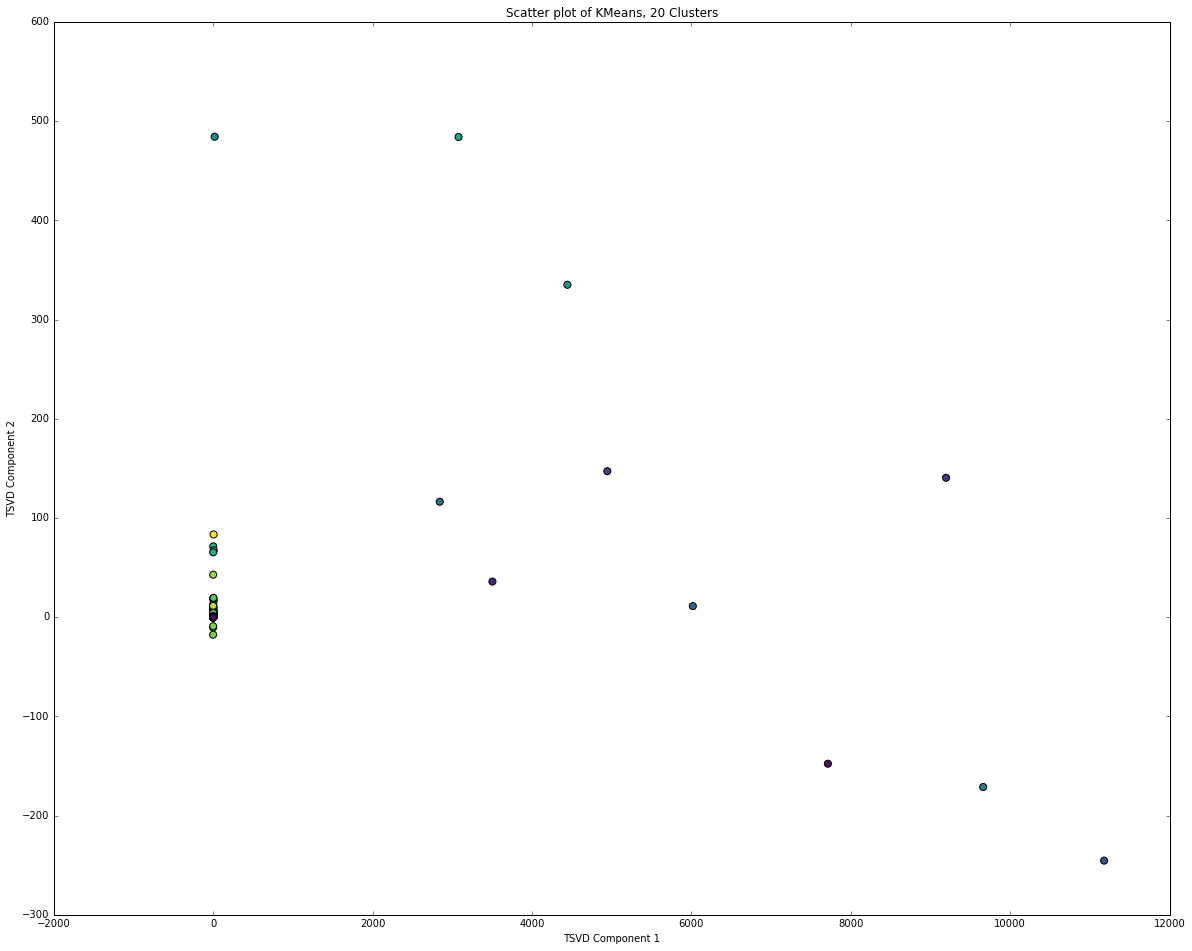

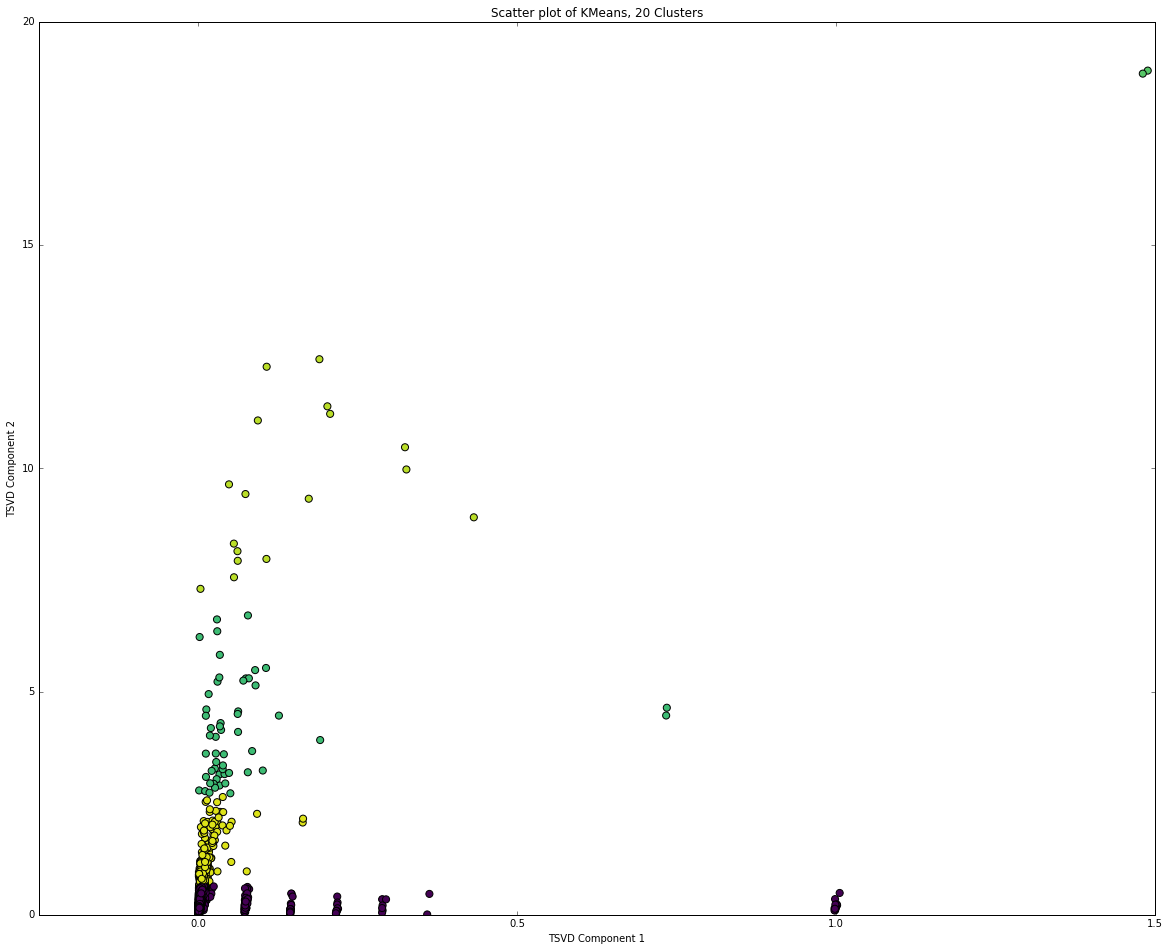

In [111]:
kmeans_and_graph(tsvd_word_data, 20)

In [ ]:
def silhouette_selection(x,k):
    scores = []
    for iteration in range(2,k):
        km = KMeans(n_clusters=iteration)
        km.fit(x)
        scores.append((iteration, metrics.silhouette_score(x, km.labels_)))
        print "I am on iteration ", iteration
    ks = [k[0] for k in scores]
    sils = [k[1] for k in scores]
    plt.plot(ks, sils)
    plt.ylabel('Silhouette Score')
    plt.xlabel("K in KMeans")

Fit the vectorizer and SVD

Fit the kmeans

Check the performance of our kmeans test

Classification Report

Confusion Matrix

Note: Repeat the kmeans test with varying values of "k" to determine the best performance